# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import pingouin as pg 
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings("ignore")

c:\users\κωστας\uoa_python_course\uoa_venv\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Reading dataset and description of features and target variable
  ##### Features
   ###### age : age beneficiary, integer
   ###### sex : gender of insurance contractor, categorical: Female | Male
   ###### bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height(float and  ideally 18.5 to 24.9)
   ###### chlidren : Number of children covered by health insurance(integer)
   ###### smoker : Smoking, categorical YES | NO(categorical)
   ###### region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest(categorical)
  ##### Target variable
   ###### Charges : medical costs billed by health insurance(float)

In [2]:
df = pd.read_csv('insurance.csv')
df_copy = df.copy() # a copy with our dataset

df.sample(10)

,age,sex,bmi,children,smoker,region,charges
993,38,male,28.270,1,no,southeast,5484.46730
176,38,male,27.835,2,no,northwest,6455.86265
1223,20,female,24.420,0,yes,southeast,26125.67477
405,52,female,38.380,2,no,northeast,11396.90020
1113,28,female,26.315,3,no,northwest,5312.16985
1060,24,male,32.010,0,no,southeast,1981.58190
1071,63,male,31.445,0,no,northeast,13974.45555
1048,25,female,22.515,1,no,northwest,3594.17085
145,29,female,38.830,3,no,southeast,5138.25670
299,48,female,28.880,1,no,northwest,9249.49520


In [3]:
for value in df.columns:
    print(df[value].dtype)
    print(df[value].unique())

int64
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
object
['female' 'male']
float64
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   

In [4]:
#View dimensions of dataset and checking for NaN values
print(df.shape)
print(df.info())
print(df.isnull().any())

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


# Exploratory analysis 

In [5]:
'''
I will split variable into both categorical and numerical in order to be easier for exploratory analysis.
'''

#Categorical features
categorical = [var for var in df.columns if df[var].dtype == 'O']
categorical_df = df[categorical]
#Numerical features
numerical = [var for var in df.columns if df[var].dtype != 'O']
numerical_df = df[numerical]

print(f'Categorical variables : {categorical}')
print(f'Numerical variables : {numerical}')

Categorical variables : ['sex', 'smoker', 'region']
Numerical variables : ['age', 'bmi', 'children', 'charges']


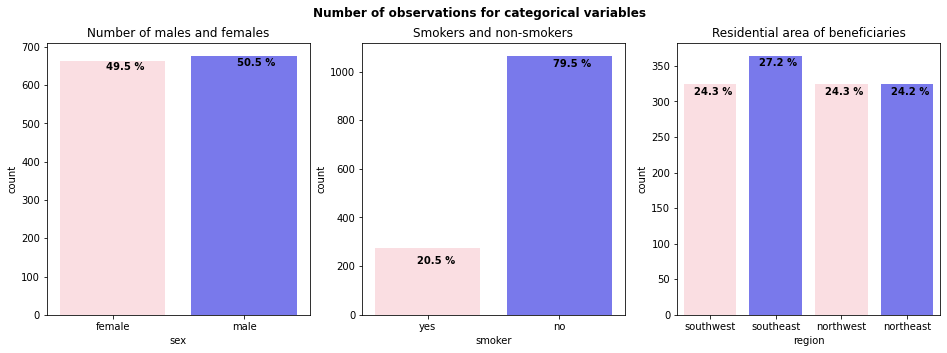

In [6]:
'''
How many are men and how many are women? 
How many are smokers and how many are non-smokers?  
Is there a suburb with more beneficiaries?
'''
# 1. About categorical variables

#3 plots in 1 row
fig, axes = plt.subplots(1, 3, figsize = (16, 5))
fig.suptitle('Number of observations for categorical variables', fontweight = 'bold')

#about gender
sns.countplot(categorical_df['sex'], ax = axes[0], palette = ['pink', 'blue'], alpha = 0.6)
axes[0].set_title('Number of males and females', fontweight = 'light')
axes[0].text(0.95, 650, f"{round(categorical_df['sex'].value_counts()[0]/len(df)* 100, 1)} %", fontweight = 'bold')
axes[0].text(-0.05, 640, f"{round(categorical_df['sex'].value_counts()[1]/len(df)* 100, 1)} %", fontweight = 'bold')


#about smokers
sns.countplot(categorical_df['smoker'], ax = axes[1], palette = ['pink', 'blue'], alpha = 0.6)
axes[1].set_title('Smokers and non-smokers', fontweight = 'light')
axes[1].text(0.95, 1020, f"{round(categorical_df['smoker'].value_counts()[0]/len(df) * 100, 1)} %", fontweight = 'bold')
axes[1].text(-0.08, 210, f"{round(categorical_df['smoker'].value_counts()[1]/len(df) * 100, 1)} %", fontweight = 'bold')


#about region 
sns.countplot(categorical_df['region'], ax = axes[2], palette = ['pink', 'blue'], alpha = 0.6)
axes[2].set_title('Residential area of beneficiaries', fontweight = 'light')
axes[2].text(0.75, 350, f"{round(categorical_df['region'].value_counts()[0]/len(df) * 100, 1)} %", fontweight = 'bold')
axes[2].text(-0.25, 310, f"{round(categorical_df['region'].value_counts()[1]/len(df) * 100, 1)} %", fontweight = 'bold')
axes[2].text(1.75, 310, f"{round(categorical_df['region'].value_counts()[2]/len(df) * 100, 1)} %", fontweight = 'bold')
axes[2].text(2.75, 310, f"{round(categorical_df['region'].value_counts()[3]/len(df) * 100, 1)} %", fontweight = 'bold');

###### sex : We note that in our sample about 50 per cent are men and the remaining 50 per cent are women. This is very good as the model we will estimate will represents both sexes.
###### smoker : On the contrary, smokers account for about 20 percent of the data set and the remaining 80 non-smokers. This means that the model we were going to estimate is more representative for non-smokers.
###### region : About the beneficiaries' residential area, we observe that 25 percent of observations are shared in 4 suburbs of US.

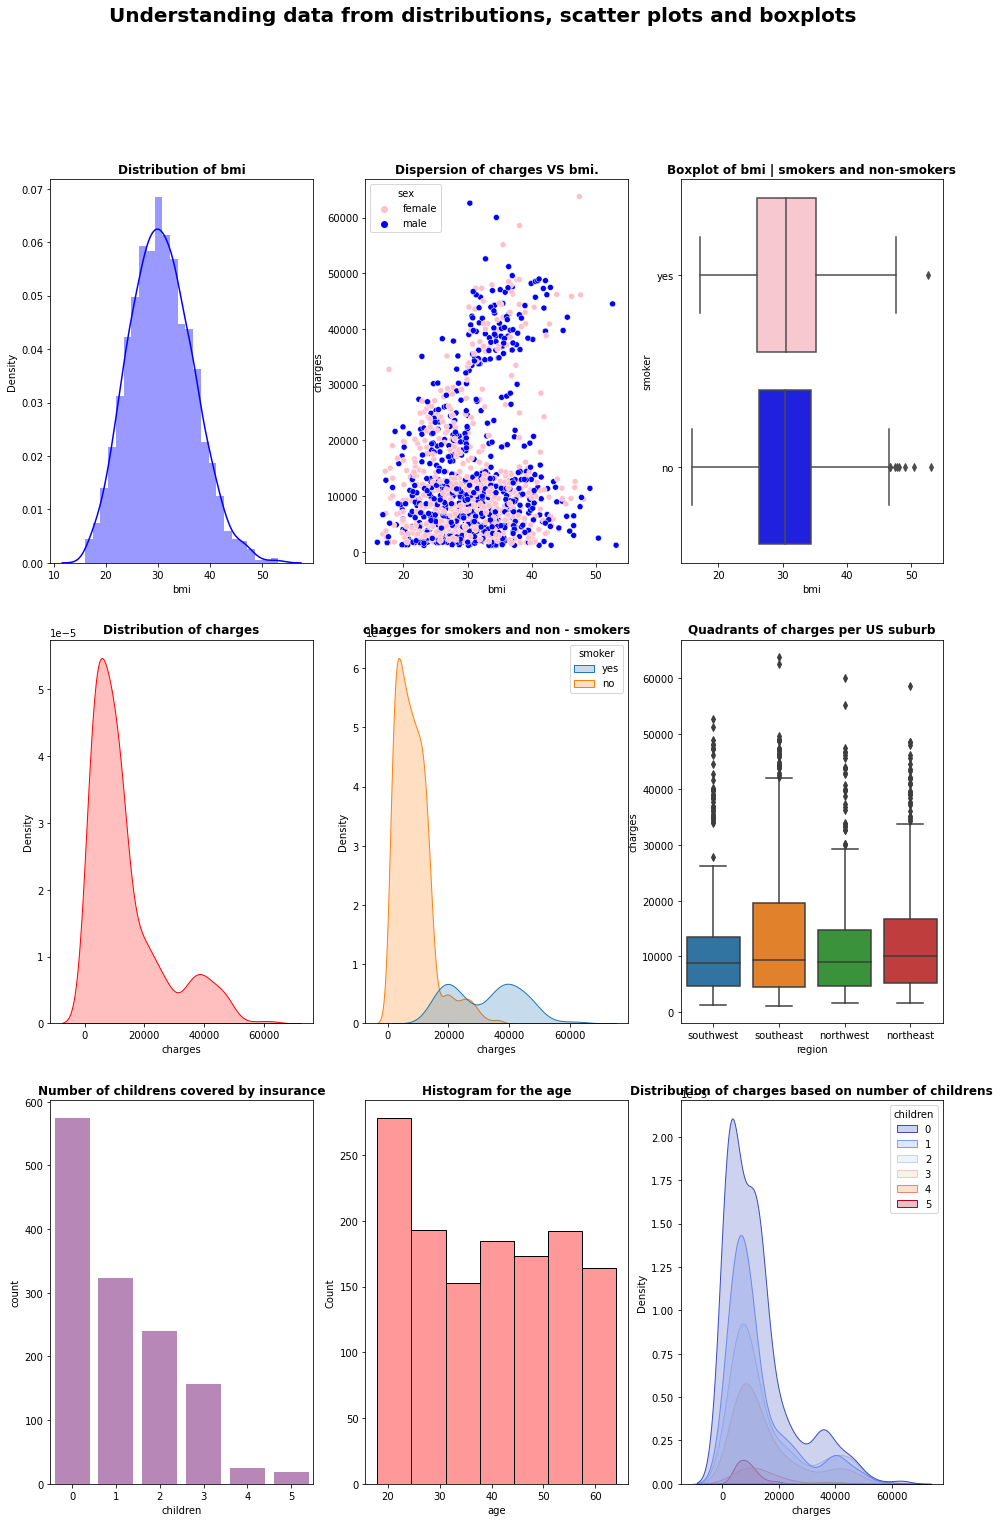

In [7]:
# 2. Distributions, outliers and the relationship between bmi and charges.

fig, axes = plt.subplots(3, 3, figsize = (16, 24))
fig.suptitle('Understanding data from distributions, scatter plots and boxplots', fontweight = 'bold', fontsize = 20)

#About bmi
sns.distplot(df['bmi'], ax = axes[0, 0], color = 'blue')
axes[0, 0].set_title('Distribution of bmi', fontweight = 'bold')

#About bmi per gender
sns.scatterplot(y = df['charges'], x = df['bmi'], hue = df['sex'], palette = ['pink', 'blue'], ax = axes[0, 1])
axes[0, 1].set_title('Dispersion of charges VS bmi.', fontweight = 'bold')

#About bmi and smokers
sns.boxplot(x = df['bmi'], y = df['smoker'], ax = axes[0, 2], palette = ['pink', 'blue'])
axes[0, 2].set_title('Boxplot of bmi | smokers and non-smokers', fontweight = 'bold')

#About target variable('charges')
sns.kdeplot(df['charges'], color = 'red', shade = True,  ax = axes[1, 0]) 
axes[1, 0].set_title('Distribution of charges', fontweight = 'bold')

#Charges and gender
sns.kdeplot(df['charges'], hue = df['smoker'], shade = True, ax = axes[1, 1])
axes[1, 1].set_title('charges for smokers and non - smokers', fontweight = 'bold')

#charges and region
sns.boxplot(x = df['region'], y = df['charges'], ax = axes[1, 2])
axes[1, 2].set_title('Quadrants of charges per US suburb', fontweight = 'bold')

#About number of childrena
sns.countplot(df['children'], color = 'purple', ax = axes[2, 0], alpha = 0.5)
axes[2, 0].set_title('Number of childrens covered by insurance', fontweight = 'bold')

#About the ages 
sns.histplot(df['age'], bins = 7, color = 'red', edgecolor = 'black', alpha = 0.4, ax = axes[2, 1])
axes[2, 1].set_title('Histogram for the age', fontweight = 'bold')


#Charges vs bmi based on number of childrens
sns.kdeplot(df['charges'], hue = df['children'], ax = axes[2, 2], shade = True, palette = 'coolwarm')
axes[2, 2].set_title('Distribution of charges based on number of childrens', fontweight = 'bold')
plt.show()

###### BMI : At first glance, looking at the distribution of BMI is evident that approaches normal distribution. Also, we know from literature that the ideal bmi for a person is between 18.5 and 24.9. However, we see much variability in the bmi from 15 to near 57. Some of these points could be considered as outliers points , especially when bmi is above 48(this will be excluded from the statistical analysis, below). Additionally, from the scatter plot (charges~bmi), we can conclude that when charges are between 0-100 the variability of bmi varies. Furthermore,  there is a more linear relationship when charges are 2000 and more. Especially, we can see that from the point 2000 as bmi increases , also increases the charges.An important conclusion in this range of charges is that most of points are represented by males. In conclusion, in chart(0, 2), initially, we know that the 80 percent of obs are non-smokers.We can see from the boxplot that about smokers  the minimum value of bmi is bigger than non-smokers, while the same can be concluded about the max value(is bigger). Also, even though , the 20 percent of obs are represented from smokers , we can see that there is one person who has extremely big bmi. Also, about non-smokers there are more points that can be characterized as outliers points but does make sense due to the fact that the 80% of our obs are non-smokers.
###### CHARGES : From the figure(1, 0) is evident that our target vaiable does not approach normal distribution. The variability about that medical costs is too much. Medical costs vary from about 1200 to near 65000. The kdeplot based on smoker feature can explain the distribution. Initially, non-smokers  can pay up to 40000.But on smokers we can observe that there are 2 peaks. Τhe first is between 2000 and 35000 and the second between 35000 and more than 60000 medical costs. This is a very important information that for more than 40000 medical costs are paid from smokers and of course does make sense.
###### NUMBER OF CHILDRENS : Furthermore, we can see that most values are collected on the left, i.e. in people who do not have children and as the number of children increases, the insurance covers a smaller number of beneficiaries. 
###### AGE : From the histogram we can see that there are two groups of ages. The first is between 20 and 40 nad the second between 40 and 60.Also, most beneficiaries are between about 18 and 25 , while between 32 and 38 the number of beneficiaries is smallest.

# Descriptive analysis

In [8]:
#numerical features
num_descr_stats = round(numerical_df.describe().T, 2)
num_descr_stats['+3std'] = num_descr_stats['mean'] + (num_descr_stats['std'] * 3)
num_descr_stats['-3std'] = num_descr_stats['mean'] - (num_descr_stats['std'] * 3)
num_descr_stats

,count,mean,std,min,25%,50%,75%,max,+3std,-3std
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00,81.36,-2.94
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13,48.96,12.36
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00,4.72,-2.54
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43,49600.45,-23059.61


In [9]:
#categorical features
categ_num_stats = categorical_df.describe()
categ_num_stats

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Data preparation

In [10]:
# Testing for multicollinearity and variance inflation factor